In [12]:
#import the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#load the data set
df = pd.read_csv("/content/financialdata.csv")
df

,credit_score,loan_amount,income,creditworthiness
0,650,15000,55000,1
1,700,20000,75000,1
2,600,10000,35000,0
3,720,25000,80000,1
4,580,5000,30000,0
5,680,18000,65000,1
6,640,12000,48000,0
7,710,22000,78000,1
8,590,7000,32000,0
9,675,17500,60000,1


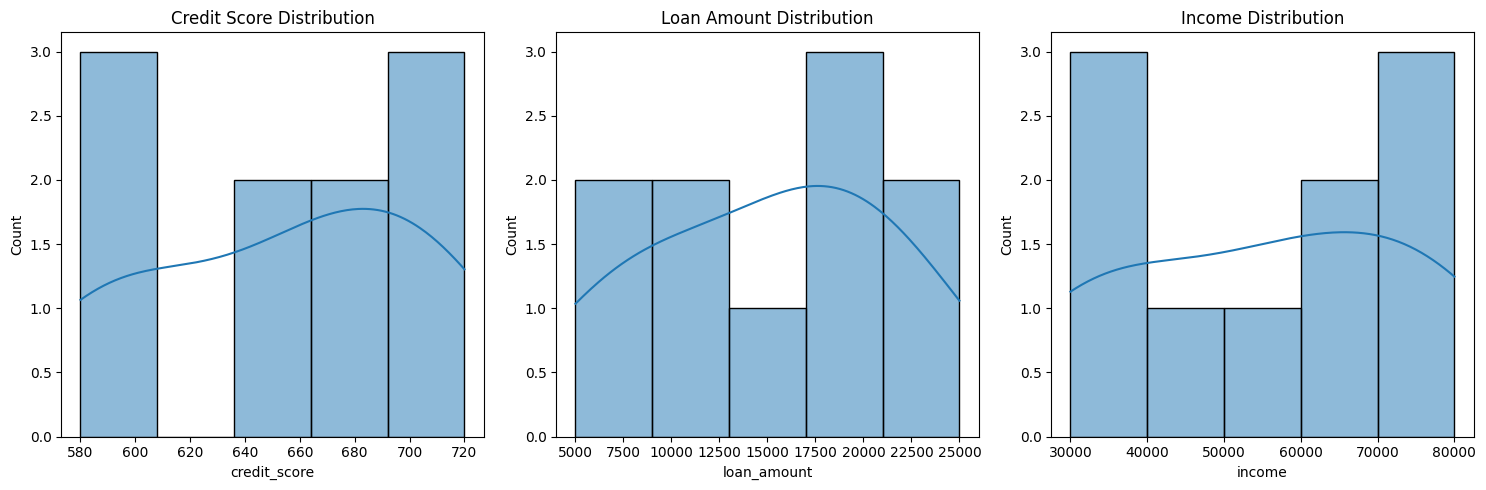

In [15]:
# Visualize the distribution of features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['credit_score'], kde=True)
plt.title('Credit Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['loan_amount'], kde=True)
plt.title('Loan Amount Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')

plt.tight_layout()
plt.show()

In [16]:
#assign features and target variable to x and y respectively
X = df[['credit_score', 'loan_amount', 'income']]
y = df['creditworthiness']

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

In [20]:
# Train models
log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)  # Decision Tree doesn't need scaling

DecisionTreeClassifier(random_state=42)

In [21]:
# Predict and evaluate the models
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test)


In [22]:
# Evaluate performance
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)

log_reg_report = classification_report(y_test, y_pred_log_reg)
decision_tree_report = classification_report(y_test, y_pred_decision_tree)

In [23]:
# Print the results
print("Logistic Regression Accuracy: ", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_report)

print("Decision Tree Accuracy: ", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", decision_tree_report)

Logistic Regression Accuracy:  1.0
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Decision Tree Accuracy:  1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

